In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
movies = pd.read_csv(r'C:\Users\cubie\Downloads\movies.csv.zip')

In [7]:
# Now let's take a look at the data

movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# We want to look into the datatype

movies.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [63]:
# Changing data types
# Data cleaning 

movies['budget'] = movies['budget'].astype('int64')

movies['gross'] = movies['gross'].astype('int64')

movies['score'] = movies['score'].astype('int64')

movies['votes'] = movies['votes'].astype('int64')

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [64]:
#Analytical summary of the dataset

movies.describe(include='all')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,5421,5421,5421,5421.000000,5421,5421.000000,5.421000e+03,5421,5421,5421,5421,5.421000e+03,5.421000e+03,5421,5421.000000
unique,5336,10,15,NaN,2560,NaN,NaN,2063,3205,1845,50,NaN,NaN,1475,NaN
top,Hercules,R,Comedy,NaN,"August 26, 2016 (United States)",NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,3,2597,1496,NaN,7,NaN,NaN,33,32,40,4319,NaN,NaN,330,NaN
mean,NaN,NaN,NaN,2001.661317,NaN,5.945951,1.150661e+05,NaN,NaN,NaN,NaN,3.600917e+07,1.032297e+08,NaN,108.152739
std,NaN,NaN,NaN,10.540908,NaN,1.007826,1.844073e+05,NaN,NaN,NaN,NaN,4.157337e+07,1.873027e+08,NaN,18.115698
min,NaN,NaN,NaN,1980.000000,NaN,1.000000,1.950000e+02,NaN,NaN,NaN,NaN,6.000000e+03,3.090000e+02,NaN,63.000000
25%,NaN,NaN,NaN,1993.000000,NaN,5.000000,1.900000e+04,NaN,NaN,NaN,NaN,1.000000e+07,1.073640e+07,NaN,95.000000
50%,NaN,NaN,NaN,2002.000000,NaN,6.000000,5.200000e+04,NaN,NaN,NaN,NaN,2.180000e+07,3.686941e+07,NaN,105.000000
75%,NaN,NaN,NaN,2011.000000,NaN,7.000000,1.290000e+05,NaN,NaN,NaN,NaN,4.500000e+07,1.124625e+08,NaN,118.000000


In [11]:
# Total number of rows and columns

movies.shape

(7668, 15)

In [13]:
# Rows containing duplicate data

duplicate_rows_movies = movies[movies.duplicated()]
print ("Number of duplicate rows: ", duplicate_rows_movies.shape)

# (0,15) means No duplicate rows

Number of duplicate rows:  (0, 15)


In [14]:
# count the rows before removing any data

movies.count()

# If you have any duplicate data
# Run
# movies = movies.drop_duplicates()

# Check the count again
# movies.count()

name        7668
rating      7591
genre       7668
year        7668
released    7666
score       7665
votes       7665
director    7668
writer      7665
star        7667
country     7665
budget      5497
gross       7479
company     7651
runtime     7664
dtype: int64

In [15]:
# Check for null value

print (movies.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [16]:
# Drop the null values

movies = movies.dropna()

In [17]:
# Check if the drop was successful

movies.count()

name        5421
rating      5421
genre       5421
year        5421
released    5421
score       5421
votes       5421
director    5421
writer      5421
star        5421
country     5421
budget      5421
gross       5421
company     5421
runtime     5421
dtype: int64

<AxesSubplot:xlabel='gross'>

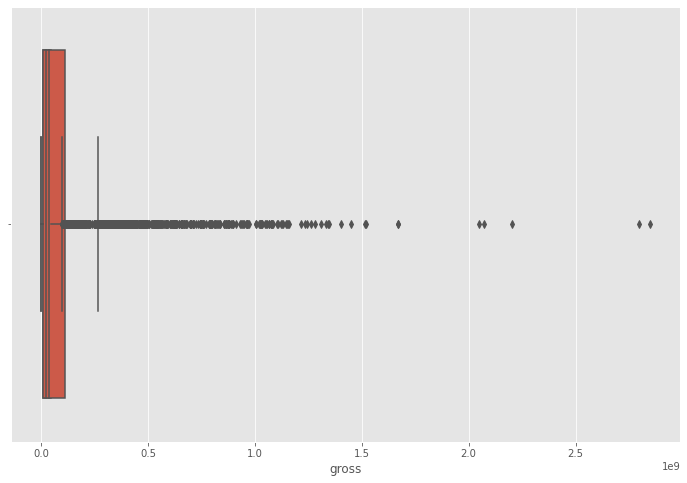

In [21]:
# Finding the outliers

sns.boxplot(x=movies['budget'])
sns.boxplot(x=movies['gross'])

In [4]:
# Order our data a little bit to see

movies.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# to display the entire set of dat

pd.set_option('display.max_rows', None)

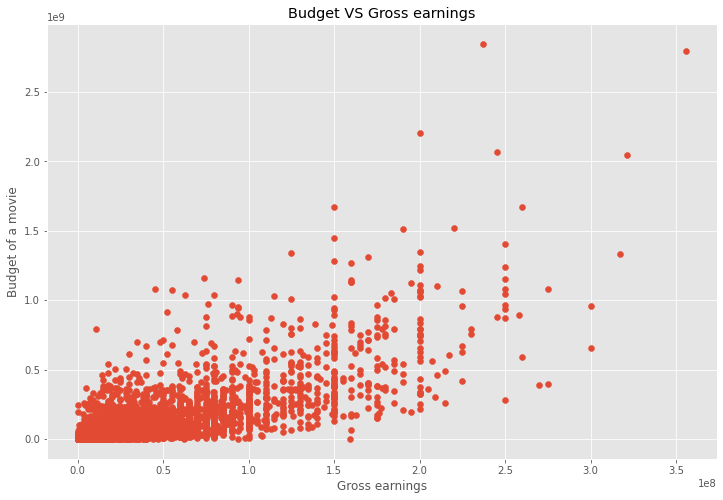

In [56]:
# Correlation
# Visualization
# Scatter plot for Budget VS Gross

plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('Budget VS Gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget of a movie')

plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

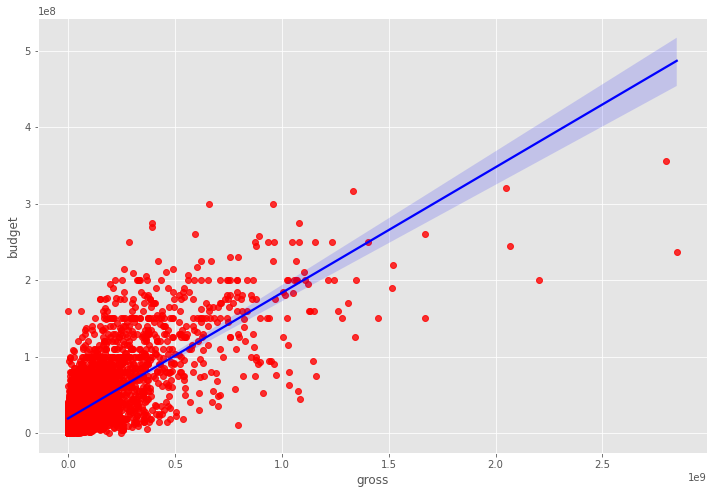

In [57]:
# Correlation
# Visualizations
# Regression Plot

sns.regplot(x="gross", y="budget", data=movies, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [39]:
# Looking at correlation using corr 

# Correlation Matrix between all numeric columns
# Multiple methods

movies.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [40]:
movies.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [41]:
movies.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


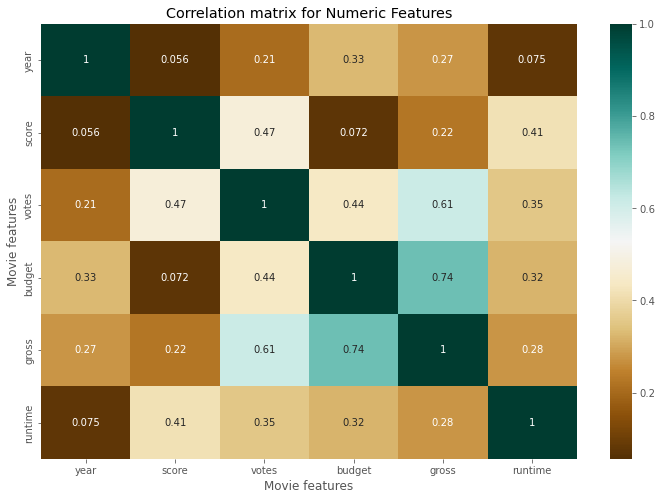

In [45]:
#Correlation visualization 

correlation_matrix = movies.corr() # Default method pearson

sns.heatmap(correlation_matrix, cmap = 'BrBG', annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [7]:
# Looking at other variables of data set 
# Numerizing 'Object' data type so that it can be included in correlation 

movies_numerized = movies

for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes

movies_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


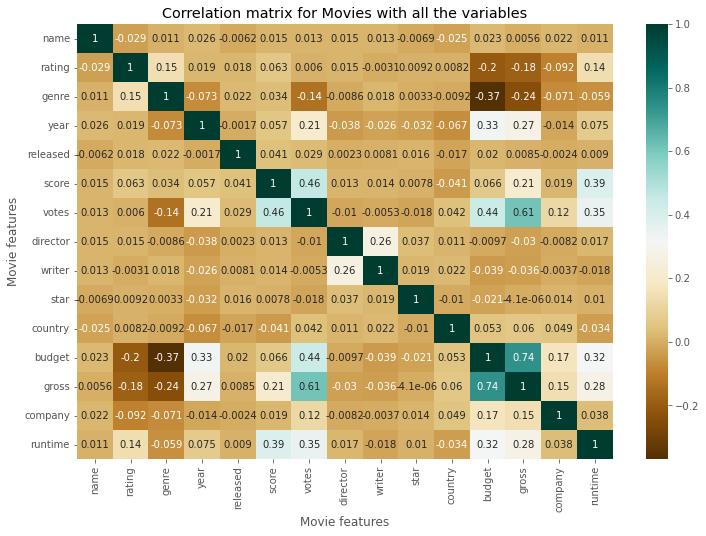

In [70]:
correlation_matrix = movies_numerized.corr() #default

sns.heatmap(correlation_matrix, cmap ='BrBG', annot = True)

plt.title("Correlation matrix for Movies with all the variables")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()